In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandata109.xlsx', index_col=0)

In [3]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg','interpreting_process_avg', 'straightforward_process_avg','avgscore']

In [4]:
df_feelings = df[identifier_columns+positive_feelings_in_school]

In [5]:
pivot_df_feelingsinschool = df_feelings.pivot_table(values=positive_feelings_in_school, index=identifier_columns, aggfunc='mean').reset_index()

In [6]:
pivot_df_feelingsinschool

,Country,ASBH02A,ASBG10A,ASBG10B,ASBG10C,ASBG10D,ASBG10E,ASBG10F
0,Austria,No,1.759465,1.570470,1.584650,1.525843,1.373034,1.170404
1,Austria,Yes,1.826697,1.577666,1.442907,1.426694,1.369663,1.095739
2,Egypt,No,1.403226,1.571429,1.540426,1.516949,1.521186,1.461538
3,Egypt,Yes,1.332351,1.472121,1.429911,1.404374,1.371104,1.305961
4,France,No,1.627119,1.703863,1.538793,1.914530,1.480851,1.175214
5,France,Yes,1.768795,1.718054,1.462446,1.935719,1.549091,1.129806
6,Germany,No,1.568966,1.544379,1.534884,1.530120,1.434524,1.257485
7,Germany,Yes,1.705419,1.468125,1.348620,1.315101,1.352225,1.106132
8,Jordan,No,1.222574,1.301384,1.257511,1.266234,1.197425,1.285866
9,Jordan,Yes,1.236234,1.299590,1.282793,1.283689,1.225996,1.240332


##  This is for bar chart

In [7]:
df_no = pivot_df_feelingsinschool[pivot_df_feelingsinschool['ASBH02A']=='No']
df_no= df_no.drop('ASBH02A', axis=1)
df_no_melted = df_no.melt(id_vars='Country', var_name='Metric', value_name='Value')

In [8]:
df_yes = pivot_df_feelingsinschool[pivot_df_feelingsinschool['ASBH02A']=='Yes']
df_yes= df_yes.drop('ASBH02A', axis=1)
df_yes_melted = df_yes.melt(id_vars='Country', var_name='Metric', value_name='Value')

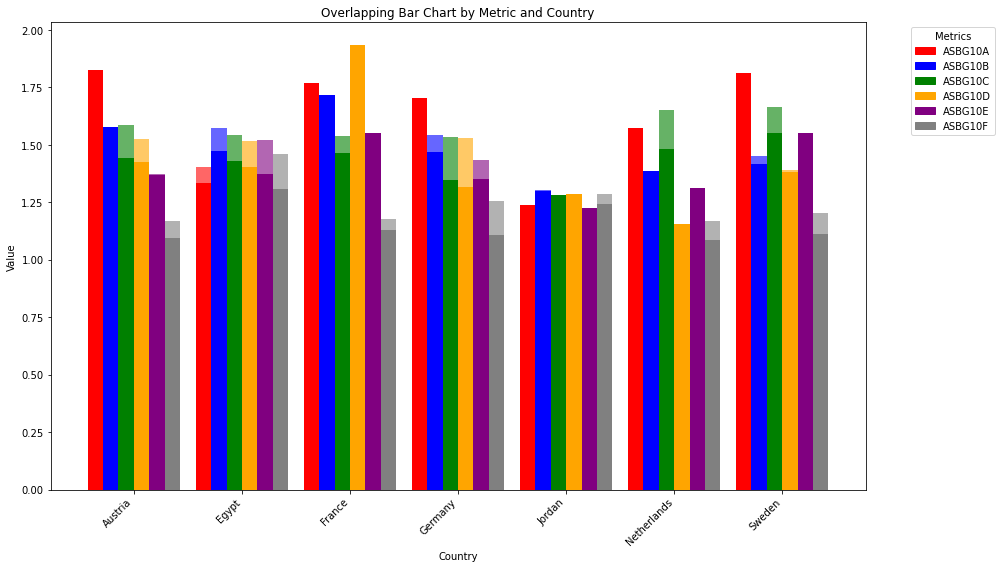

In [9]:
# Define bar width
bar_width = 1
n_metrics = df_no_melted['Metric'].nunique()

# Colors for each metric
colors = {
    'ASBG10A': 'red',
    'ASBG10B': 'blue',
    'ASBG10C': 'green',
    'ASBG10D': 'orange',
    'ASBG10E': 'purple',
    'ASBG10F': 'grey'
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Get unique countries and metrics
countries = df_no_melted['Country'].unique()
metrics = df_no_melted['Metric'].unique()

# Create x indices for each group of bars
indices = np.arange(len(countries)) * (n_metrics + 1)

# Plot each group of bars for 'yes' and 'no'
for i, metric in enumerate(metrics):
    yes_values = df_yes_melted[df_yes_melted['Metric'] == metric].set_index('Country').reindex(countries)['Value']
    no_values = df_no_melted[df_no_melted['Metric'] == metric].set_index('Country').reindex(countries)['Value']
    
    color = colors[metric]
    ax.bar(indices + i * bar_width, yes_values, bar_width, color=color, alpha=1.0)
    ax.bar(indices + i * bar_width, no_values, bar_width, color=color, alpha=0.6)

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_title('Overlapping Bar Chart by Metric and Country')

# Set x-ticks and x-tick labels
ax.set_xticks(indices + bar_width * (n_metrics - 1) / 2)
ax.set_xticklabels(countries, rotation=45, ha='right')

# Create custom legend
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=metric) for metric, color in colors.items()]
ax.legend(handles=legend_handles, title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show plot
plt.tight_layout()
plt.show()

This isn't as clear cut as with assessment scores - which is interesting actually. Feeling better than their test results?

 1: Agree a lot; 2: Agree a little; 3: Disagree a little; 4: Disagree a lot\
 
ASBG10A	GEN\AGREE\BEING IN SCHOOL\
ASBG10B	GEN\AGREE\SAFE AT SCHOOL\
ASBG10C	GEN\AGREE\BELONG AT SCHOOL\
ASBG10D	GEN\AGREE\TEACHERS ARE FAIR\
ASBG10E	GEN\AGREE\PROUD TO GO TO SCHOOL\
ASBG10F	GEN\AGREE\FRIENDS AT SCHOOL